## Solving the LINE problem with a single perceptron

In [33]:
# imports

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [2]:
# line equation: y = w*x + c
w = 3
c = 5
X = torch.FloatTensor(
    [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]
).to(device)
Y = torch.FloatTensor([[w * x + c] for x in range(12)]).to(device)
# Y = torch.FloatTensor([[5], [8], [11], [14], [17], [20], [23], [26], [29], [32], [35], [38]]).to(device) # 3x+5

In [3]:
# Perceptron model
model = nn.Sequential(
    nn.Linear(1, 1, bias=True),
).to(device)

nn.Linear = Applies a linear transformation to the incoming data: Y = w*X^T+b

References:

https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

In [4]:
print("Starting weights: {}".format(model[0].weight))
print("Starting bias: {}".format(model[0].bias))

Starting weights: Parameter containing:
tensor([[0.0478]], requires_grad=True)
Starting bias: Parameter containing:
tensor([-0.7265], requires_grad=True)


#### loss and optimizer
loss: loss function is a method of evaluating how well your machine learning algorithm models your featured data set.

optimizer: optimizers are algorithms or methods used to change the parameters of your neural network such as weights and learning rate in order to reduce the loss.

MSELoss: $\frac{1}{n}\sum (y - \hat{y})^2$

In [5]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
for step in range(5000):
    pred = model(X)
    loss = criterion(pred, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print("step:", step, " loss:", loss.item())

step: 0  loss: 586.26806640625
step: 200  loss: 0.8379953503608704
step: 400  loss: 0.09019842743873596
step: 600  loss: 0.009708689525723457
step: 800  loss: 0.0010449107503518462
step: 1000  loss: 0.00011247845395701006
step: 1200  loss: 1.2105698260711506e-05
step: 1400  loss: 1.302817508985754e-06
step: 1600  loss: 1.406380789603645e-07
step: 1800  loss: 1.5170522615903792e-08
step: 2000  loss: 1.8573397264631808e-09
step: 2200  loss: 5.492021837305572e-10
step: 2400  loss: 5.492021837305572e-10
step: 2600  loss: 5.492021837305572e-10
step: 2800  loss: 5.492021837305572e-10
step: 3000  loss: 5.492021837305572e-10
step: 3200  loss: 5.492021837305572e-10
step: 3400  loss: 5.492021837305572e-10
step: 3600  loss: 5.492021837305572e-10
step: 3800  loss: 5.492021837305572e-10
step: 4000  loss: 5.492021837305572e-10
step: 4200  loss: 5.492021837305572e-10
step: 4400  loss: 5.492021837305572e-10
step: 4600  loss: 5.492021837305572e-10
step: 4800  loss: 5.492021837305572e-10


In [7]:
pred = model(X)
print(pred)

tensor([[ 5.0000],
        [ 8.0000],
        [11.0000],
        [14.0000],
        [17.0000],
        [20.0000],
        [23.0000],
        [26.0000],
        [29.0000],
        [32.0000],
        [35.0000],
        [38.0000]], grad_fn=<AddmmBackward0>)


In [8]:
new_value = torch.FloatTensor([[12]]).to(device)
new_pred = model(new_value)
print(new_pred)

tensor([[41.0000]], grad_fn=<AddmmBackward0>)


In [9]:
print("Learned weights: {}".format(model[0].weight))
print("Learned bias: {}".format(model[0].bias))

Learned weights: Parameter containing:
tensor([[3.0000]], requires_grad=True)
Learned bias: Parameter containing:
tensor([5.0000], requires_grad=True)


## Solving OR problem with a single perceptron

| x1 | x2 | y |
|:--:|:--:|:-:|
|  0 |  0 | 0 |
|  0 |  1 | 1 |
|  1 |  0 | 1 |
|  1 |  1 | 1 |

In [10]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [1]]).to(device)

In [11]:
model = nn.Sequential(nn.Linear(2, 1, bias=True), nn.Sigmoid()).to(device)

nn.Sigmoid: Applies the element-wise sigmoid function

<img src="https://pytorch.org/docs/stable/_images/Sigmoid.png">

References:

https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

In [12]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

detach() method in PyTorch is used to separate a tensor from the computational graph by returning a new tensor that doesn't require a gradient

In [13]:
losses = []
for step in range(5000):
    pred = model(X)
    loss = criterion(pred, Y)
    losses.append(loss.cpu().detach().numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print("step:", step, " loss:", loss.item())

step: 0  loss: 0.3073482811450958
step: 200  loss: 0.10565894097089767
step: 400  loss: 0.07673379778862
step: 600  loss: 0.058310616761446
step: 800  loss: 0.046080220490694046
step: 1000  loss: 0.03757263720035553
step: 1200  loss: 0.03141342103481293
step: 1400  loss: 0.026803219690918922
step: 1600  loss: 0.023254362866282463
step: 1800  loss: 0.02045678161084652
step: 2000  loss: 0.018206223845481873
step: 2200  loss: 0.016363853588700294
step: 2400  loss: 0.014832685701549053
step: 2600  loss: 0.013543263077735901
step: 2800  loss: 0.012444780208170414
step: 3000  loss: 0.011499378830194473
step: 3200  loss: 0.01067830715328455
step: 3400  loss: 0.009959408082067966
step: 3600  loss: 0.009325386956334114
step: 3800  loss: 0.0087625402957201
step: 4000  loss: 0.008259915746748447
step: 4200  loss: 0.007808621972799301
step: 4400  loss: 0.007401423528790474
step: 4600  loss: 0.007032354827970266
step: 4800  loss: 0.006696441676467657


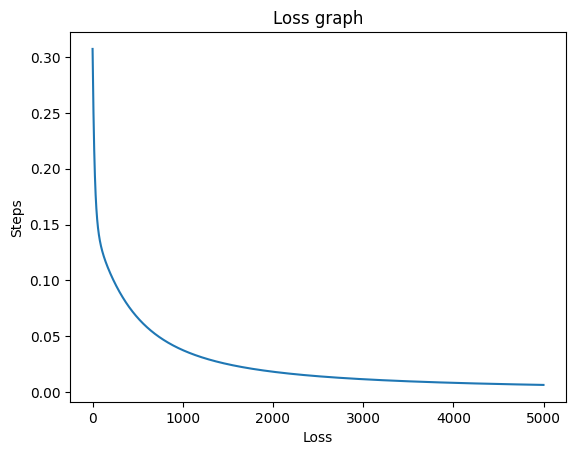

In [14]:
import matplotlib.pyplot as plt

plt.plot(list(range(5000)), losses)
plt.title("Loss graph")
plt.xlabel("Loss")
plt.ylabel("Steps")
plt.show()

In [15]:
pred = model(X)
print(pred)

tensor([[0.1207],
        [0.9259],
        [0.9259],
        [0.9991]], grad_fn=<SigmoidBackward0>)


Thresholding to obtain the 0 or 1 as final output

In [16]:
out = 1 * (pred >= 0.5)
print(out)

tensor([[0],
        [1],
        [1],
        [1]])


## Solving AND problem with a single perceptron

| x1 | x2 | y |
|:--:|:--:|:-:|
|  0 |  0 | 0 |
|  0 |  1 | 0 |
|  1 |  0 | 0 |
|  1 |  1 | 1 |

In [17]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [0], [0], [1]]).to(device)

In [18]:
# Perceptron model
model = nn.Sequential(nn.Linear(2, 1, bias=True), nn.Sigmoid()).to(device)

In [19]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [20]:
for step in range(5000):
    pred = model(X)
    loss = criterion(pred, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print("step:", step, " loss:", loss.item())

step: 0  loss: 0.22330258786678314
step: 200  loss: 0.14672958850860596
step: 400  loss: 0.10737352818250656
step: 600  loss: 0.08487455546855927
step: 800  loss: 0.07008256018161774
step: 1000  loss: 0.05947452038526535
step: 1200  loss: 0.05145256221294403
step: 1400  loss: 0.04517009109258652
step: 1600  loss: 0.040124472230672836
step: 1800  loss: 0.03599298745393753
step: 2000  loss: 0.032556530088186264
step: 2200  loss: 0.02966037392616272
step: 2400  loss: 0.027191873639822006
step: 2600  loss: 0.025067010894417763
step: 2800  loss: 0.023221923038363457
step: 3000  loss: 0.021607249975204468
step: 3200  loss: 0.02018427848815918
step: 3400  loss: 0.01892227865755558
step: 3600  loss: 0.0177965946495533
step: 3800  loss: 0.016787158325314522
step: 4000  loss: 0.01587763987481594
step: 4200  loss: 0.015054477378726006
step: 4400  loss: 0.01430642418563366
step: 4600  loss: 0.013624048791825771
step: 4800  loss: 0.012999389320611954


In [21]:
pred = model(X)
print(pred)

tensor([[0.0031],
        [0.1202],
        [0.1202],
        [0.8557]], grad_fn=<SigmoidBackward0>)


In [22]:
out = 1 * (pred >= 0.5)
print(out)

tensor([[0],
        [0],
        [0],
        [1]])


## Solving XOR problem with a single perceptron

| x1 | x2 | y |
|:--:|:--:|:-:|
|  0 |  0 | 0 |
|  0 |  1 | 1 |
|  1 |  0 | 1 |
|  1 |  1 | 0 |

In [23]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [24]:
# Perceptron model
model = nn.Sequential(nn.Linear(2, 1, bias=True), nn.Sigmoid()).to(device)

In [25]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [26]:
for step in range(5000):
    pred = model(X)
    loss = criterion(pred, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print("step:", step, " loss:", loss.item())

step: 0  loss: 0.2529272437095642
step: 200  loss: 0.2510547935962677
step: 400  loss: 0.25040072202682495
step: 600  loss: 0.2501578629016876
step: 800  loss: 0.25006455183029175
step: 1000  loss: 0.25002723932266235
step: 1200  loss: 0.25001177191734314
step: 1400  loss: 0.25000518560409546
step: 1600  loss: 0.25000232458114624
step: 1800  loss: 0.2500010132789612
step: 2000  loss: 0.2500004470348358
step: 2200  loss: 0.2500002086162567
step: 2400  loss: 0.25000011920928955
step: 2600  loss: 0.2500000596046448
step: 2800  loss: 0.2500000298023224
step: 3000  loss: 0.25
step: 3200  loss: 0.2499999850988388
step: 3400  loss: 0.25
step: 3600  loss: 0.2499999850988388
step: 3800  loss: 0.2500000298023224
step: 4000  loss: 0.25
step: 4200  loss: 0.2499999701976776
step: 4400  loss: 0.25
step: 4600  loss: 0.25
step: 4800  loss: 0.25


In [27]:
pred = model(X)
print(pred)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [28]:
# Perceptron model
model = nn.Sequential(
    nn.Linear(2, 2, bias=True),
    nn.Sigmoid(),
    nn.Linear(2, 1, bias=True),
).to(device)

In [29]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [30]:
for step in range(5000):
    pred = model(X)
    loss = criterion(pred, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print("step:", step, " loss:", loss.item())

step: 0  loss: 1.8950634002685547
step: 200  loss: 0.25024911761283875
step: 400  loss: 0.2500915825366974
step: 600  loss: 0.2500085234642029
step: 800  loss: 0.24995484948158264
step: 1000  loss: 0.24991272389888763
step: 1200  loss: 0.24987313151359558
step: 1400  loss: 0.24982964992523193
step: 1600  loss: 0.24977606534957886
step: 1800  loss: 0.24970471858978271
step: 2000  loss: 0.2496049702167511
step: 2200  loss: 0.2494606077671051
step: 2400  loss: 0.24924606084823608
step: 2600  loss: 0.24891842901706696
step: 2800  loss: 0.24840207397937775
step: 3000  loss: 0.24755489826202393
step: 3200  loss: 0.24609144032001495
step: 3400  loss: 0.24339960515499115
step: 3600  loss: 0.23808163404464722
step: 3800  loss: 0.22677229344844818
step: 4000  loss: 0.20107576251029968
step: 4200  loss: 0.14232441782951355
step: 4400  loss: 0.05208967998623848
step: 4600  loss: 0.007365099154412746
step: 4800  loss: 0.0006039688014425337


In [31]:
pred = model(X)
print(pred)

tensor([[0.0081],
        [0.9941],
        [0.9929],
        [0.0040]], grad_fn=<AddmmBackward0>)


In [32]:
out = 1 * (pred >= 0.5)
print(out)

tensor([[0],
        [1],
        [1],
        [0]])
